In [1]:
import requests
import pandas as pd
import numpy as np
from datetime import date
from datetime import timedelta
import openpyxl
import locale

In [2]:
serie = "SR16573"
inicio = "1994-01-24"
ayer= "2022-12-18"
#fin = "2023-02-23"
url="https://www.banxico.org.mx/SieAPIRest/service/v1/series/SR16573/"+"datos/"+inicio+"/"+ayer
print(url)
#https://www.banxico.org.mx/SieAPIRest/service/v1/series/SF61745/datos/2023-01-31/2023-01-31"

https://www.banxico.org.mx/SieAPIRest/service/v1/series/SR16573/datos/1994-01-24/2022-12-18


In [3]:
token="1c0c5c42c3fe3cd828f409280b828e8a0ba915746a415ed6d2be86a9b85e86c1"

In [4]:
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

'en_US.UTF-8'

In [5]:
def descargar_tc1(token):
    
    
    headers={"Bmx-Token":token}
    response= requests.get(url,headers=headers)
    status=response.status_code
    if status !=200:
        return print("Error en consulta, codigo {}".format(status))
    raw_data=response.json()
    data=raw_data["bmx"]["series"][0]["datos"]
    print(data)
    tc=pd.DataFrame(data)
    tc["dato"]=tc["dato"].apply(lambda x: float(x.replace(',', '')))
    tc["fecha"]=pd.to_datetime(tc["fecha"], format="%d/%m/%Y")
    tc.set_index("fecha",inplace=True)
    return tc

descargar_tc1(token)

[{'fecha': '01/04/1994', 'dato': '10,772,526.2'}, {'fecha': '01/07/1994', 'dato': '10,602,752.9'}, {'fecha': '01/10/1994', 'dato': '10,952,773.4'}, {'fecha': '01/01/1995', 'dato': '10,189,745.5'}, {'fecha': '01/04/1995', 'dato': '9,795,719.0'}, {'fecha': '01/07/1995', 'dato': '9,802,904.4'}, {'fecha': '01/10/1995', 'dato': '10,198,513.3'}, {'fecha': '01/01/1996', 'dato': '10,426,430.9'}, {'fecha': '01/04/1996', 'dato': '10,569,227.5'}, {'fecha': '01/07/1996', 'dato': '10,583,112.1'}, {'fecha': '01/10/1996', 'dato': '11,116,526.6'}, {'fecha': '01/01/1997', 'dato': '10,862,932.0'}, {'fecha': '01/04/1997', 'dato': '11,460,068.1'}, {'fecha': '01/07/1997', 'dato': '11,408,200.8'}, {'fecha': '01/10/1997', 'dato': '11,887,380.1'}, {'fecha': '01/01/1998', 'dato': '11,827,638.0'}, {'fecha': '01/04/1998', 'dato': '12,034,464.2'}, {'fecha': '01/07/1998', 'dato': '11,972,371.6'}, {'fecha': '01/10/1998', 'dato': '12,139,816.6'}, {'fecha': '01/01/1999', 'dato': '12,100,154.5'}, {'fecha': '01/04/1999

,dato
fecha,
1994-04-01,10772526.2
1994-07-01,10602752.9
1994-10-01,10952773.4
1995-01-01,10189745.5
1995-04-01,9795719.0
...,...
2021-10-01,18273129.2
2022-01-01,17761376.9
2022-04-01,18402501.4


In [6]:
tipo_cambio=((descargar_tc1(token)).iat[0,0])
print(tipo_cambio)
type(tipo_cambio)

[{'fecha': '01/04/1994', 'dato': '10,772,526.2'}, {'fecha': '01/07/1994', 'dato': '10,602,752.9'}, {'fecha': '01/10/1994', 'dato': '10,952,773.4'}, {'fecha': '01/01/1995', 'dato': '10,189,745.5'}, {'fecha': '01/04/1995', 'dato': '9,795,719.0'}, {'fecha': '01/07/1995', 'dato': '9,802,904.4'}, {'fecha': '01/10/1995', 'dato': '10,198,513.3'}, {'fecha': '01/01/1996', 'dato': '10,426,430.9'}, {'fecha': '01/04/1996', 'dato': '10,569,227.5'}, {'fecha': '01/07/1996', 'dato': '10,583,112.1'}, {'fecha': '01/10/1996', 'dato': '11,116,526.6'}, {'fecha': '01/01/1997', 'dato': '10,862,932.0'}, {'fecha': '01/04/1997', 'dato': '11,460,068.1'}, {'fecha': '01/07/1997', 'dato': '11,408,200.8'}, {'fecha': '01/10/1997', 'dato': '11,887,380.1'}, {'fecha': '01/01/1998', 'dato': '11,827,638.0'}, {'fecha': '01/04/1998', 'dato': '12,034,464.2'}, {'fecha': '01/07/1998', 'dato': '11,972,371.6'}, {'fecha': '01/10/1998', 'dato': '12,139,816.6'}, {'fecha': '01/01/1999', 'dato': '12,100,154.5'}, {'fecha': '01/04/1999

numpy.float64

In [7]:
(descargar_tc1(token)).to_excel("output1.xlsx") 

[{'fecha': '01/04/1994', 'dato': '10,772,526.2'}, {'fecha': '01/07/1994', 'dato': '10,602,752.9'}, {'fecha': '01/10/1994', 'dato': '10,952,773.4'}, {'fecha': '01/01/1995', 'dato': '10,189,745.5'}, {'fecha': '01/04/1995', 'dato': '9,795,719.0'}, {'fecha': '01/07/1995', 'dato': '9,802,904.4'}, {'fecha': '01/10/1995', 'dato': '10,198,513.3'}, {'fecha': '01/01/1996', 'dato': '10,426,430.9'}, {'fecha': '01/04/1996', 'dato': '10,569,227.5'}, {'fecha': '01/07/1996', 'dato': '10,583,112.1'}, {'fecha': '01/10/1996', 'dato': '11,116,526.6'}, {'fecha': '01/01/1997', 'dato': '10,862,932.0'}, {'fecha': '01/04/1997', 'dato': '11,460,068.1'}, {'fecha': '01/07/1997', 'dato': '11,408,200.8'}, {'fecha': '01/10/1997', 'dato': '11,887,380.1'}, {'fecha': '01/01/1998', 'dato': '11,827,638.0'}, {'fecha': '01/04/1998', 'dato': '12,034,464.2'}, {'fecha': '01/07/1998', 'dato': '11,972,371.6'}, {'fecha': '01/10/1998', 'dato': '12,139,816.6'}, {'fecha': '01/01/1999', 'dato': '12,100,154.5'}, {'fecha': '01/04/1999

In [8]:
filename1="output1.xlsx"

In [9]:
df = pd.read_excel(filename1)
df

,fecha,dato
0,1994-04-01,10772526.2
1,1994-07-01,10602752.9
2,1994-10-01,10952773.4
3,1995-01-01,10189745.5
4,1995-04-01,9795719.0
...,...,...
110,2021-10-01,18273129.2
111,2022-01-01,17761376.9
112,2022-04-01,18402501.4
113,2022-07-01,18330898.2


In [10]:
df = df.set_index('fecha')

In [11]:
returns = df.pct_change()
returns

,dato
fecha,
1994-04-01,NaN
1994-07-01,-0.015760
1994-10-01,0.033012
1995-01-01,-0.069665
1995-04-01,-0.038669
...,...
2021-10-01,0.040394
2022-01-01,-0.028006
2022-04-01,0.036097


<AxesSubplot:xlabel='fecha'>

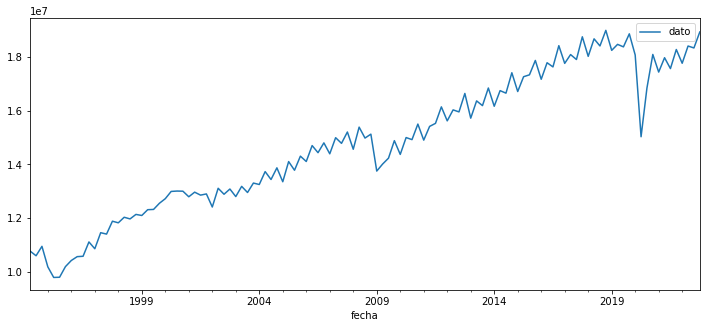

In [12]:
df['dato'].plot(legend=True,figsize=(12,5))

In [13]:
serie = "SP30578"
inicio = "1994-01-24"
ayer= "2022-12-18"
#fin = "2023-02-23"
url="https://www.banxico.org.mx/SieAPIRest/service/v1/series/"+serie+"/"+"datos/"+inicio+"/"+ayer
print(url)
#https://www.banxico.org.mx/SieAPIRest/service/v1/series/SF61745/datos/2023-01-31/2023-01-31"

https://www.banxico.org.mx/SieAPIRest/service/v1/series/SP30578/datos/1994-01-24/2022-12-18


In [14]:
token="1c0c5c42c3fe3cd828f409280b828e8a0ba915746a415ed6d2be86a9b85e86c1"

In [15]:
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

'en_US.UTF-8'

In [16]:
descargar_tc1(token)
inflacion=((descargar_tc1(token)).iat[0,0])
print(inflacion)
type(inflacion)

[{'fecha': '01/02/1994', 'dato': '7.18000000'}, {'fecha': '01/03/1994', 'dato': '7.10000000'}, {'fecha': '01/04/1994', 'dato': '7.01000000'}, {'fecha': '01/05/1994', 'dato': '6.92000000'}, {'fecha': '01/06/1994', 'dato': '6.85000000'}, {'fecha': '01/07/1994', 'dato': '6.81000000'}, {'fecha': '01/08/1994', 'dato': '6.74000000'}, {'fecha': '01/09/1994', 'dato': '6.71000000'}, {'fecha': '01/10/1994', 'dato': '6.83000000'}, {'fecha': '01/11/1994', 'dato': '6.93000000'}, {'fecha': '01/12/1994', 'dato': '7.05000000'}, {'fecha': '01/01/1995', 'dato': '10.23000000'}, {'fecha': '01/02/1995', 'dato': '14.31000000'}, {'fecha': '01/03/1995', 'dato': '20.43000000'}, {'fecha': '01/04/1995', 'dato': '29.39000000'}, {'fecha': '01/05/1995', 'dato': '34.15000000'}, {'fecha': '01/06/1995', 'dato': '37.72000000'}, {'fecha': '01/07/1995', 'dato': '39.91000000'}, {'fecha': '01/08/1995', 'dato': '41.57000000'}, {'fecha': '01/09/1995', 'dato': '43.48000000'}, {'fecha': '01/10/1995', 'dato': '45.66000000'}, {'

[{'fecha': '01/02/1994', 'dato': '7.18000000'}, {'fecha': '01/03/1994', 'dato': '7.10000000'}, {'fecha': '01/04/1994', 'dato': '7.01000000'}, {'fecha': '01/05/1994', 'dato': '6.92000000'}, {'fecha': '01/06/1994', 'dato': '6.85000000'}, {'fecha': '01/07/1994', 'dato': '6.81000000'}, {'fecha': '01/08/1994', 'dato': '6.74000000'}, {'fecha': '01/09/1994', 'dato': '6.71000000'}, {'fecha': '01/10/1994', 'dato': '6.83000000'}, {'fecha': '01/11/1994', 'dato': '6.93000000'}, {'fecha': '01/12/1994', 'dato': '7.05000000'}, {'fecha': '01/01/1995', 'dato': '10.23000000'}, {'fecha': '01/02/1995', 'dato': '14.31000000'}, {'fecha': '01/03/1995', 'dato': '20.43000000'}, {'fecha': '01/04/1995', 'dato': '29.39000000'}, {'fecha': '01/05/1995', 'dato': '34.15000000'}, {'fecha': '01/06/1995', 'dato': '37.72000000'}, {'fecha': '01/07/1995', 'dato': '39.91000000'}, {'fecha': '01/08/1995', 'dato': '41.57000000'}, {'fecha': '01/09/1995', 'dato': '43.48000000'}, {'fecha': '01/10/1995', 'dato': '45.66000000'}, {'

numpy.float64

In [17]:
(descargar_tc1(token)).to_excel("output2.xlsx") 

[{'fecha': '01/02/1994', 'dato': '7.18000000'}, {'fecha': '01/03/1994', 'dato': '7.10000000'}, {'fecha': '01/04/1994', 'dato': '7.01000000'}, {'fecha': '01/05/1994', 'dato': '6.92000000'}, {'fecha': '01/06/1994', 'dato': '6.85000000'}, {'fecha': '01/07/1994', 'dato': '6.81000000'}, {'fecha': '01/08/1994', 'dato': '6.74000000'}, {'fecha': '01/09/1994', 'dato': '6.71000000'}, {'fecha': '01/10/1994', 'dato': '6.83000000'}, {'fecha': '01/11/1994', 'dato': '6.93000000'}, {'fecha': '01/12/1994', 'dato': '7.05000000'}, {'fecha': '01/01/1995', 'dato': '10.23000000'}, {'fecha': '01/02/1995', 'dato': '14.31000000'}, {'fecha': '01/03/1995', 'dato': '20.43000000'}, {'fecha': '01/04/1995', 'dato': '29.39000000'}, {'fecha': '01/05/1995', 'dato': '34.15000000'}, {'fecha': '01/06/1995', 'dato': '37.72000000'}, {'fecha': '01/07/1995', 'dato': '39.91000000'}, {'fecha': '01/08/1995', 'dato': '41.57000000'}, {'fecha': '01/09/1995', 'dato': '43.48000000'}, {'fecha': '01/10/1995', 'dato': '45.66000000'}, {'

In [18]:
filename2="output2.xlsx"
df1 = pd.read_excel(filename2)
df1

,fecha,dato
0,1994-02-01,7.18
1,1994-03-01,7.10
2,1994-04-01,7.01
3,1994-05-01,6.92
4,1994-06-01,6.85
...,...,...
342,2022-08-01,8.70
343,2022-09-01,8.70
344,2022-10-01,8.41
345,2022-11-01,7.80


In [19]:
df1 = df1.set_index('fecha')

<AxesSubplot:xlabel='fecha'>

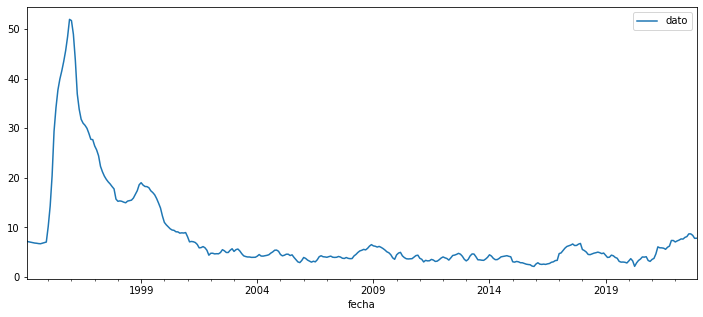

In [20]:
df1['dato'].plot(legend=True,figsize=(12,5))

In [21]:
serie = "SF43783"
inicio = "1995-03-23"
ayer= "2022-12-18"
#fin = "2023-02-23"
url="https://www.banxico.org.mx/SieAPIRest/service/v1/series/"+serie+"/"+"datos/"+inicio+"/"+ayer
print(url)
#https://www.banxico.org.mx/SieAPIRest/service/v1/series/SF61745/datos/2023-01-31/2023-01-31"

https://www.banxico.org.mx/SieAPIRest/service/v1/series/SF43783/datos/1995-03-23/2022-12-18


In [22]:
token="1c0c5c42c3fe3cd828f409280b828e8a0ba915746a415ed6d2be86a9b85e86c1"
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

def descargar_tc1(token):
    
    
    headers={"Bmx-Token":token}
    response= requests.get(url,headers=headers)
    status=response.status_code
    if status !=200:
        return print("Error en consulta, codigo {}".format(status))
    raw_data=response.json()
    data=raw_data["bmx"]["series"][0]["datos"]
    print(data)
    tc=pd.DataFrame(data)
    tc["dato"]=tc["dato"].replace('N/E',"0")
    tc["dato"]=tc["dato"].apply(lambda x: float(x.replace(',', '')))
    tc["fecha"]=pd.to_datetime(tc["fecha"], format="%d/%m/%Y")
    tc.set_index("fecha",inplace=True)
    return tc

descargar_tc1(token)


interes=((descargar_tc1(token)).iat[0,0])
print(interes)
type(interes)

[{'fecha': '23/03/1995', 'dato': '90.5000'}, {'fecha': '24/03/1995', 'dato': 'N/E'}, {'fecha': '27/03/1995', 'dato': 'N/E'}, {'fecha': '28/03/1995', 'dato': 'N/E'}, {'fecha': '29/03/1995', 'dato': 'N/E'}, {'fecha': '30/03/1995', 'dato': '88.4650'}, {'fecha': '31/03/1995', 'dato': 'N/E'}, {'fecha': '03/04/1995', 'dato': 'N/E'}, {'fecha': '04/04/1995', 'dato': 'N/E'}, {'fecha': '05/04/1995', 'dato': 'N/E'}, {'fecha': '06/04/1995', 'dato': '88.6000'}, {'fecha': '07/04/1995', 'dato': 'N/E'}, {'fecha': '10/04/1995', 'dato': 'N/E'}, {'fecha': '11/04/1995', 'dato': 'N/E'}, {'fecha': '12/04/1995', 'dato': '88.6944'}, {'fecha': '17/04/1995', 'dato': 'N/E'}, {'fecha': '18/04/1995', 'dato': 'N/E'}, {'fecha': '19/04/1995', 'dato': 'N/E'}, {'fecha': '20/04/1995', 'dato': '88.7071'}, {'fecha': '21/04/1995', 'dato': 'N/E'}, {'fecha': '24/04/1995', 'dato': 'N/E'}, {'fecha': '25/04/1995', 'dato': 'N/E'}, {'fecha': '26/04/1995', 'dato': 'N/E'}, {'fecha': '27/04/1995', 'dato': '74.8800'}, {'fecha': '28/0

[{'fecha': '23/03/1995', 'dato': '90.5000'}, {'fecha': '24/03/1995', 'dato': 'N/E'}, {'fecha': '27/03/1995', 'dato': 'N/E'}, {'fecha': '28/03/1995', 'dato': 'N/E'}, {'fecha': '29/03/1995', 'dato': 'N/E'}, {'fecha': '30/03/1995', 'dato': '88.4650'}, {'fecha': '31/03/1995', 'dato': 'N/E'}, {'fecha': '03/04/1995', 'dato': 'N/E'}, {'fecha': '04/04/1995', 'dato': 'N/E'}, {'fecha': '05/04/1995', 'dato': 'N/E'}, {'fecha': '06/04/1995', 'dato': '88.6000'}, {'fecha': '07/04/1995', 'dato': 'N/E'}, {'fecha': '10/04/1995', 'dato': 'N/E'}, {'fecha': '11/04/1995', 'dato': 'N/E'}, {'fecha': '12/04/1995', 'dato': '88.6944'}, {'fecha': '17/04/1995', 'dato': 'N/E'}, {'fecha': '18/04/1995', 'dato': 'N/E'}, {'fecha': '19/04/1995', 'dato': 'N/E'}, {'fecha': '20/04/1995', 'dato': '88.7071'}, {'fecha': '21/04/1995', 'dato': 'N/E'}, {'fecha': '24/04/1995', 'dato': 'N/E'}, {'fecha': '25/04/1995', 'dato': 'N/E'}, {'fecha': '26/04/1995', 'dato': 'N/E'}, {'fecha': '27/04/1995', 'dato': '74.8800'}, {'fecha': '28/0

numpy.float64

In [24]:
(descargar_tc1(token)).to_excel("output3.xlsx") 
filename3="output3.xlsx"
df2 = pd.read_excel(filename3)
df2['datos'] = df2['datos'].replace('N/E', 0)
df2

[{'fecha': '23/03/1995', 'dato': '90.5000'}, {'fecha': '24/03/1995', 'dato': 'N/E'}, {'fecha': '27/03/1995', 'dato': 'N/E'}, {'fecha': '28/03/1995', 'dato': 'N/E'}, {'fecha': '29/03/1995', 'dato': 'N/E'}, {'fecha': '30/03/1995', 'dato': '88.4650'}, {'fecha': '31/03/1995', 'dato': 'N/E'}, {'fecha': '03/04/1995', 'dato': 'N/E'}, {'fecha': '04/04/1995', 'dato': 'N/E'}, {'fecha': '05/04/1995', 'dato': 'N/E'}, {'fecha': '06/04/1995', 'dato': '88.6000'}, {'fecha': '07/04/1995', 'dato': 'N/E'}, {'fecha': '10/04/1995', 'dato': 'N/E'}, {'fecha': '11/04/1995', 'dato': 'N/E'}, {'fecha': '12/04/1995', 'dato': '88.6944'}, {'fecha': '17/04/1995', 'dato': 'N/E'}, {'fecha': '18/04/1995', 'dato': 'N/E'}, {'fecha': '19/04/1995', 'dato': 'N/E'}, {'fecha': '20/04/1995', 'dato': '88.7071'}, {'fecha': '21/04/1995', 'dato': 'N/E'}, {'fecha': '24/04/1995', 'dato': 'N/E'}, {'fecha': '25/04/1995', 'dato': 'N/E'}, {'fecha': '26/04/1995', 'dato': 'N/E'}, {'fecha': '27/04/1995', 'dato': '74.8800'}, {'fecha': '28/0

KeyError: 'datos'

In [25]:
df2 = df2.set_index('fecha')

<AxesSubplot:xlabel='fecha'>

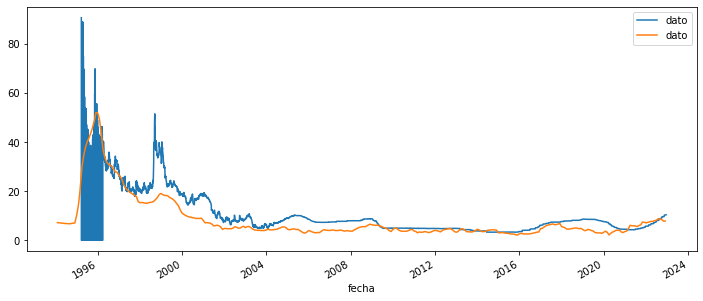

In [26]:
df2['dato'].plot(legend=True,figsize=(12,5))
df1['dato'].plot(legend=True,figsize=(12,5))